In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# cv2 to matplotlib
def cv2mat(img):
    b,g,r = cv2.split(img)
    ret = cv2.merge([r,g,b])
    return ret

def cv_show(img):
    plt.imshow(cv2mat(img))
    

def cv_show1(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey() #ms 不输入代表任意键销毁窗口
    cv2.destroyAllWindows()

## 匹配单个模板

In [3]:
# 导入数据
tem = cv2.imread("01_Picture/12_Face.jpg")  # 模板
img = cv2.imread("01_Picture/07_Lena.jpg") 

# 获得模板高度和宽度 - 为了绘图需要
h,w = tem.shape[:-1] 

# 模板匹配
res = cv2.matchTemplate(img, tem, cv2.TM_SQDIFF_NORMED)

print(tem.shape,img.shape,res.shape) # res.shape[0] = img.shape[0] - tem.shape[0] + 1 ,res.shape[1] = ...
res

(110, 85, 3) (263, 263, 3) (154, 179)


array([[0.20558473, 0.20372054, 0.2015518 , ..., 0.2964305 , 0.29873306,
        0.3012136 ],
       [0.20542265, 0.20366919, 0.20162915, ..., 0.29717758, 0.29961294,
        0.30242413],
       [0.20528822, 0.2036367 , 0.20168696, ..., 0.29813537, 0.30075586,
        0.30394545],
       ...,
       [0.31591752, 0.32190883, 0.32803175, ..., 0.19614364, 0.19211999,
        0.18805619],
       [0.31720427, 0.32312745, 0.32878724, ..., 0.19492511, 0.19112983,
        0.18728769],
       [0.3184004 , 0.32426518, 0.3292904 , ..., 0.19353996, 0.19004928,
        0.18643165]], dtype=float32)

0.0007202174165286124 0.4072243571281433 (107, 89) (39, 153)


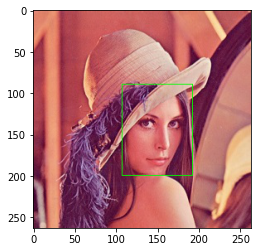

In [14]:
# 匹配位置查找
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

# 画出匹配图形
img_draw = img.copy()
cv2.rectangle(img_draw, min_loc, (min_loc[0]+w, min_loc[1]+h), (0,255,0), 1)

cv_show(img_draw)

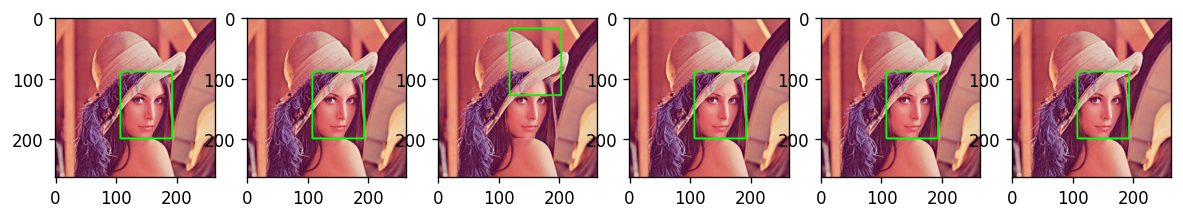

In [23]:
# 不同模板匹配方法对比
methods = [
    'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED'
]

plt.figure(figsize=(12,3), dpi=120)
for index,method in enumerate(methods):
    method = eval(method)
    res = cv2.matchTemplate(img, tem, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = top_left[0]+w, top_left[1]+h
    
    img_draw = img.copy()
    cv2.rectangle(img_draw, top_left, bottom_right, (0,255,0), 2)
    
    plt.subplot(1,len(methods),index+1)
    cv_show(img_draw)

## 模板匹配多个对象

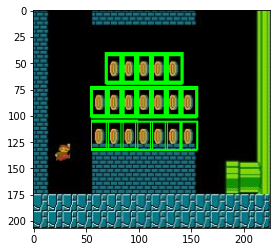

In [60]:
# 导入
tem = cv2.imread("01_Picture/15_Mario_coin.jpg",0) # 0指的是灰度图 = cv2.COLOR_BGR2GRAY
img_bgr = cv2.imread("01_Picture/14_Mario.jpg")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
#cv_show1(tem)

# 图像高宽
h,w = tem.shape[:2]

# 模板匹配
res = cv2.matchTemplate(img, tem, method=cv2.TM_SQDIFF_NORMED)
threshold = 0.3
coord_match = np.where(res < threshold) # 元组，内含2元素，第一个是宽度的坐标，第二个是高度的坐标

# 打印
for top_left in zip(*coord_match[::-1]):
    bottom_right = top_left[0]+w, top_left[1]+h
    cv2.rectangle(img_bgr, top_left, bottom_right, (0,255,0), 1)
cv_show(img_bgr)